In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
carpeta="data/Only_training_hipotesis_salida/"

In [25]:
df =pd.read_pickle(carpeta+"pTEST_new_1_0.csv.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, sc...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ro...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.13574...","[0.9788695, 0.01811362, 0.0030169408]","[1.0, 0.0, 0.0]",0,2336,entailment,entailment,NOUN ...,entailment_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.18997...","[0.6724764, 0.2568347, 0.070688926]","[0.0, 0.0, 1.0]",0,5116,entailment,contradiction,NOUN ...,contradiction_entailment
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.10871399, 0.0196...","[0.0037653015, 0.043564644, 0.95267]","[0.0, 0.0, 1.0]",0,4231,contradiction,contradiction,NOU...,contradiction_contradiction
3,3,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.09413...","[0.1862099, 0.08259979, 0.7311903]","[1.0, 0.0, 0.0]",0,4192,contradiction,entailment,NOUN V...,entailment_contradiction
4,4,"[NULL{null,ADJ}, girl{girl,NOUN}, wearing{wear...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.2301...","[0.027529342, 0.96806026, 0.004410434]","[0.0, 1.0, 0.0]",0,9714,neutral,neutral,...,neutral_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,13381,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[9.536099e-05, 0.0034259642, 0.99647874]","[0.0, 1.0, 0.0]",1,9812,contradiction,neutral,...,neutral_contradiction
13382,13382,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.0028200522, 0.004673798, 0.9925061]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,...,contradiction_contradiction
13383,13383,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21120092, 0.01119...","[0.020970339, 0.053988796, 0.92504084]","[1.0, 0.0, 0.0]",1,9814,contradiction,entailment,...,entailment_contradiction
13384,13384,"[NULL{null,PROPN}, a{a,DET}, female{female,ADJ...","[NULL{null,PROPN}, someone{someone,NOUN}, is{b...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.19364926, 0.016168319, 0.2539...","[0.0026934592, 0.017580545, 0.979726]","[0.0, 0.0, 1.0]",1,9816,contradiction,contradiction,...,contradiction_contradiction


In [26]:
df_con_p=df[df["Paraphrase"]==1]
df_sin_p=df[df["Paraphrase"]==0]
df_con_p

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
6693,6693,"[NULL{null,ADJ}, this{this,DET}, church{church...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.1517...","[0.07976091, 0.19504343, 0.72519565]","[0.0, 1.0, 0.0]",1,0,contradiction,neutral,...,neutral_contradiction
6694,6694,"[NULL{null,ADJ}, this{this,DET}, church{church...","[NULL{null,ADJ}, theirs{-PRON-,PRON}, are{be,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.35683542, 0.011193112, 0.2865...","[0.0013921496, 0.011565615, 0.9870422]","[0.0, 0.0, 1.0]",1,2,contradiction,contradiction,...,contradiction_contradiction
6695,6695,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, two{two,NUM},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.08687423, 0.0111...","[0.10430093, 0.8780595, 0.017639566]","[0.0, 1.0, 0.0]",1,3,neutral,neutral,NOUN VERB ADP ADV ADJ N...,neutral_neutral
6696,6696,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, someone{someone,NOUN}, is{b...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.19364926, 0.016168319, 0.1100...","[0.4405384, 0.5468464, 0.012615246]","[1.0, 0.0, 0.0]",1,4,neutral,entailment,NOUN VERB ADP ...,entailment_neutral
6697,6697,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, m...","[NULL{null,PROPN}, an{an,DET}, ad{ad,NOUN}, fo...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.22340748, 0.0773...","[0.0044907494, 0.8143963, 0.18111289]","[0.0, 1.0, 0.0]",1,7,neutral,neutral,...,neutral_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13381,13381,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[9.536099e-05, 0.0034259642, 0.99647874]","[0.0, 1.0, 0.0]",1,9812,contradiction,neutral,...,neutral_contradiction
13382,13382,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.0028200522, 0.004673798, 0.9925061]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,...,contradiction_contradiction
13383,13383,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,ADJ}, two{two,NUM}, girls{girl,NOUN...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21120092, 0.01119...","[0.020970339, 0.053988796, 0.92504084]","[1.0, 0.0, 0.0]",1,9814,contradiction,entailment,...,entailment_contradiction
13384,13384,"[NULL{null,PROPN}, a{a,DET}, female{female,ADJ...","[NULL{null,PROPN}, someone{someone,NOUN}, is{b...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.19364926, 0.016168319, 0.2539...","[0.0026934592, 0.017580545, 0.979726]","[0.0, 0.0, 1.0]",1,9816,contradiction,contradiction,...,contradiction_contradiction


In [27]:
df_sin_p

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, sc...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ro...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.13574...","[0.9788695, 0.01811362, 0.0030169408]","[1.0, 0.0, 0.0]",0,2336,entailment,entailment,NOUN ...,entailment_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.18997...","[0.6724764, 0.2568347, 0.070688926]","[0.0, 0.0, 1.0]",0,5116,entailment,contradiction,NOUN ...,contradiction_entailment
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.10871399, 0.0196...","[0.0037653015, 0.043564644, 0.95267]","[0.0, 0.0, 1.0]",0,4231,contradiction,contradiction,NOU...,contradiction_contradiction
3,3,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.09413...","[0.1862099, 0.08259979, 0.7311903]","[1.0, 0.0, 0.0]",0,4192,contradiction,entailment,NOUN V...,entailment_contradiction
4,4,"[NULL{null,ADJ}, girl{girl,NOUN}, wearing{wear...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.2301...","[0.027529342, 0.96806026, 0.004410434]","[0.0, 1.0, 0.0]",0,9714,neutral,neutral,...,neutral_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6688,6688,"[NULL{null,PROPN}, a{a,DET}, dog{dog,NOUN}, ca...","[NULL{null,PROPN}, an{an,DET}, elephant{elepha...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.23631452, 0.0161...","[0.0071672816, 0.053597197, 0.9392355]","[0.0, 0.0, 1.0]",0,6462,contradiction,contradiction,NOUN ...,contradiction_contradiction
6689,6689,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,PROPN}, the{the,DET}, dog{dog,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.3574316, 0.01616...","[0.9809878, 0.016868683, 0.0021435847]","[1.0, 0.0, 0.0]",0,4152,entailment,entailment,NOUN...,entailment_entailment
6690,6690,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.19866677, 0.7972267, 0.0041064136]","[0.0, 1.0, 0.0]",0,1631,neutral,neutral,...,neutral_neutral
6691,6691,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ta...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.08883...","[0.027471043, 0.5746405, 0.39788845]","[0.0, 1.0, 0.0]",0,1339,neutral,neutral,...,neutral_neutral


In [28]:
indices_correctos_p=set()
indices_incorrectos_p=set()
indices_correctos=set()
indices_incorrectos=set()

In [29]:
for index,strings in df_con_p.iterrows():
    if(strings["predicted_label"]==strings["gold_label"]):
        indices_correctos_p.add(strings["Idx"])
    else:
        indices_incorrectos_p.add(strings["Idx"])
for index,strings in df_sin_p.iterrows():
    if(strings["predicted_label"]==strings["gold_label"]):
        indices_correctos.add(strings["Idx"])
    else:
        indices_incorrectos.add(strings["Idx"])

In [30]:
print("Correctos con parafrásis: ",len(indices_correctos_p))
print("Incorrectos con parafrásis: ",len(indices_incorrectos_p))

Correctos con parafrásis:  2884
Incorrectos con parafrásis:  3809


# Accuracy de los datos con parafrase

In [31]:
2884/6693*100

43.0897953085313

In [32]:
print("Correctos sin parafrásis: ",len(indices_correctos))
print("Incorrectos sin parafrásis: ",len(indices_incorrectos))

Correctos sin parafrásis:  5691
Incorrectos sin parafrásis:  1002


# Accuracy de los datos sin parafraseo

In [33]:
5691/6693

0.8502913491707754

# Queremos identificar que par de <T,H> se infirió correctamente a través del parafraseo de la hipótesis

In [34]:
parafraseo_correctos=indices_correctos_p.difference(indices_correctos)
len(parafraseo_correctos)

286

In [35]:
parafraseo_correctos

{67,
 85,
 186,
 312,
 330,
 347,
 379,
 395,
 668,
 699,
 700,
 707,
 875,
 899,
 946,
 971,
 1016,
 1099,
 1138,
 1166,
 1216,
 1271,
 1318,
 1342,
 1391,
 1410,
 1430,
 1436,
 1677,
 1682,
 1715,
 1739,
 1744,
 1795,
 1846,
 1926,
 2022,
 2045,
 2081,
 2126,
 2139,
 2164,
 2248,
 2252,
 2258,
 2388,
 2449,
 2450,
 2487,
 2491,
 2510,
 2622,
 2627,
 2645,
 2664,
 2685,
 2700,
 2718,
 2731,
 2734,
 2737,
 2752,
 2813,
 2956,
 2966,
 3040,
 3076,
 3100,
 3103,
 3195,
 3236,
 3253,
 3271,
 3298,
 3329,
 3331,
 3354,
 3371,
 3414,
 3430,
 3478,
 3513,
 3587,
 3751,
 3848,
 3881,
 3882,
 3951,
 3964,
 3965,
 4014,
 4015,
 4049,
 4062,
 4075,
 4133,
 4191,
 4243,
 4282,
 4310,
 4330,
 4365,
 4371,
 4381,
 4398,
 4444,
 4464,
 4490,
 4521,
 4562,
 4588,
 4596,
 4621,
 4678,
 4685,
 4712,
 4748,
 4751,
 4838,
 4843,
 4908,
 4937,
 5085,
 5105,
 5116,
 5159,
 5179,
 5206,
 5233,
 5243,
 5259,
 5280,
 5336,
 5421,
 5488,
 5498,
 5570,
 5593,
 5598,
 5629,
 5656,
 5707,
 5708,
 5719,
 5722,
 57

In [36]:
df_parafraseos_correctos=df[df["Idx"].isin(parafraseo_correctos)]
df_parafraseos_correctos

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.18997...","[0.6724764, 0.2568347, 0.070688926]","[0.0, 0.0, 1.0]",0,5116,entailment,contradiction,NOUN ...,contradiction_entailment
8,8,"[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[NULL{null,PROPN}, the{the,DET}, women{woman,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.21101676, 0.0111...","[0.6881418, 0.054109935, 0.25774822]","[0.0, 0.0, 1.0]",0,8034,entailment,contradiction,...,contradiction_entailment
26,26,"[NULL{null,ADJ}, two{two,NUM}, oriental{orient...","[NULL{null,PROPN}, the{the,DET}, old{old,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.051428292, 0.171...","[0.018711159, 0.5130414, 0.46824744]","[0.0, 0.0, 1.0]",0,2622,neutral,contradiction,NOUN ...,contradiction_neutral
63,63,"[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[NULL{null,PROPN}, the{the,DET}, fire{fire,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.14185286, 0.1999...","[0.7180802, 0.2520174, 0.029902322]","[0.0, 0.0, 1.0]",0,4191,entailment,contradiction,...,contradiction_entailment
80,80,"[NULL{null,PROPN}, a{a,DET}, brown{brown,ADJ},...","[NULL{null,PROPN}, a{a,DET}, dog{dog,NOUN}, wa...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.3574316, 0.04039...","[0.0038863374, 0.5188373, 0.47727633]","[0.0, 0.0, 1.0]",0,7526,neutral,contradiction,...,contradiction_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13295,13295,"[NULL{null,ADJ}, people{people,NOUN}, landscap...","[NULL{null,ADJ}, two{two,NUM}, soccer{soccer,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.30296716, 0.13544...","[6.225875e-06, 0.00010737981, 0.9998864]","[0.0, 0.0, 1.0]",1,9671,contradiction,contradiction,...,contradiction_contradiction
13362,13362,"[NULL{null,ADJ}, two{two,NUM}, male{male,NOUN}...","[NULL{null,PROPN}, the{the,DET}, bearded{beard...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.17295991, 0.0161...","[0.0014218371, 0.027939301, 0.97063893]","[0.0, 0.0, 1.0]",1,9771,contradiction,contradiction,...,contradiction_contradiction
13366,13366,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.017189398, 0.041627575, 0.94118303]","[0.0, 0.0, 1.0]",1,9783,contradiction,contradiction,NOUN ...,contradiction_contradiction
13371,13371,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, few{few,ADJ}, coo...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.13514067, 0.1475...","[0.00013684329, 0.003470077, 0.996393]","[0.0, 0.0, 1.0]",1,9789,contradiction,contradiction,...,contradiction_contradiction


In [18]:
df_parafraseos_correctos.to_pickle("revisarH.pickle")

In [ ]:
df_parafraseos_correctos=pd.read_pickle("revisarH.pickle")

In [40]:
check = df_parafraseos_correctos[df_parafraseos_correctos["Idx"]==5116]

In [41]:
check

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.18997...","[0.6724764, 0.2568347, 0.070688926]","[0.0, 0.0, 1.0]",0,5116,entailment,contradiction,NOUN ...,contradiction_entailment
10155,10155,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, soccer{soccer,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.30296716, 0.1684...","[0.010382513, 0.43363982, 0.5559776]","[0.0, 0.0, 1.0]",1,5116,contradiction,contradiction,...,contradiction_contradiction


In [72]:
new_data = {'Idx' : [], 'Texto': [], 'Hipotesis': [],'M_Align':[],'ma_umbral':[],'Paraphrase':[],'predicted_label':[],'gold_label':[]}
#sns.set(rc={'figure.figsize':(20,90)})
#fig,  axes= plt.subplots(9, 2)

for i in parafraseo_correctos:
    j=0
    temp=df_parafraseos_correctos[df_parafraseos_correctos["Idx"]==i]
    #print(temp.index[0])
    idx=temp.at[temp.index[0],"Idx"]
    t=temp.at[temp.index[0],"Text"]
    h=temp.at[temp.index[0],"Hipotesis"]
    matriz=temp.at[temp.index[0],"M_Align"]
    matrizPOS=temp.at[temp.index[0],"ma_umbral"]
    paraphrase=temp.at[temp.index[0],"Paraphrase"]
    tn=len(t)-1
    hn=len(h)-1
    if(len(t)>41 & len(h)>41):
        tn=41
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(t)>41):
        tn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(h)>41):
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    else:
        matriz_c=matriz[1:tn,1:hn]
    df_matriz=pd.DataFrame(matriz_c,columns=h[1:hn],index=t[1:tn])
#    sns.heatmap(ax=axes[j,0],data=df_matriz, center=0, cmap='Blues_r', annot=True)
    #axes[j,0].set(title="Parafraseo: "+str(paraphrase))
    
    predic=temp.at[temp.index[0],"predicted_label"]
    gold=temp.at[temp.index[0],"gold_label"]
    new_data['Idx'].append(idx)
    new_data['Texto'].append(t)
    new_data['Hipotesis'].append(h)
    new_data['M_Align'].append(df_matriz)
    new_data['ma_umbral'].append(matrizPOS)
    new_data['Paraphrase'].append(paraphrase)
    new_data['predicted_label'].append(predic)
    new_data['gold_label'].append(gold)

    idx=temp.at[temp.index[1],"Idx"]
    t=temp.at[temp.index[1],"Text"]
    h=temp.at[temp.index[1],"Hipotesis"]
    matriz=temp.at[temp.index[1],"M_Align"]
    matrizPOS=temp.at[temp.index[1],"ma_umbral"]
    paraphrase=temp.at[temp.index[1],"Paraphrase"]
    tn=len(t)-1
    hn=len(h)-1
    if(len(t)>41 & len(h)>41):
        tn=41
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(t)>41):
        tn=41
        matriz_c=matriz[1:tn,1:hn]
    elif(len(h)>41):
        hn=41
        matriz_c=matriz[1:tn,1:hn]
    else:
        matriz_c=matriz[1:tn,1:hn]
    df_matriz=pd.DataFrame(matriz_c,columns=h[1:hn],index=t[1:tn])
#    sns.heatmap(ax=axes[j,1],data=df_matriz, center=0, cmap='Blues_r', annot=True)
    #axes[j,1].set(title="Parafraseo: "+str(paraphrase))
    predic=temp.at[temp.index[1],"predicted_label"]
    gold=temp.at[temp.index[1],"gold_label"]
    new_data['Idx'].append(idx)
    new_data['Texto'].append(t)
    new_data['Hipotesis'].append(h)
    new_data['M_Align'].append(df_matriz)
    new_data['ma_umbral'].append(matrizPOS)
    new_data['Paraphrase'].append(paraphrase)
    new_data['predicted_label'].append(predic)
    new_data['gold_label'].append(gold)
    j=j+1
#plt.show()
dfn=pd.DataFrame(new_data)    

In [90]:
dfn.Idx[0]

3587

In [91]:
dfn.Idx[1]

3587

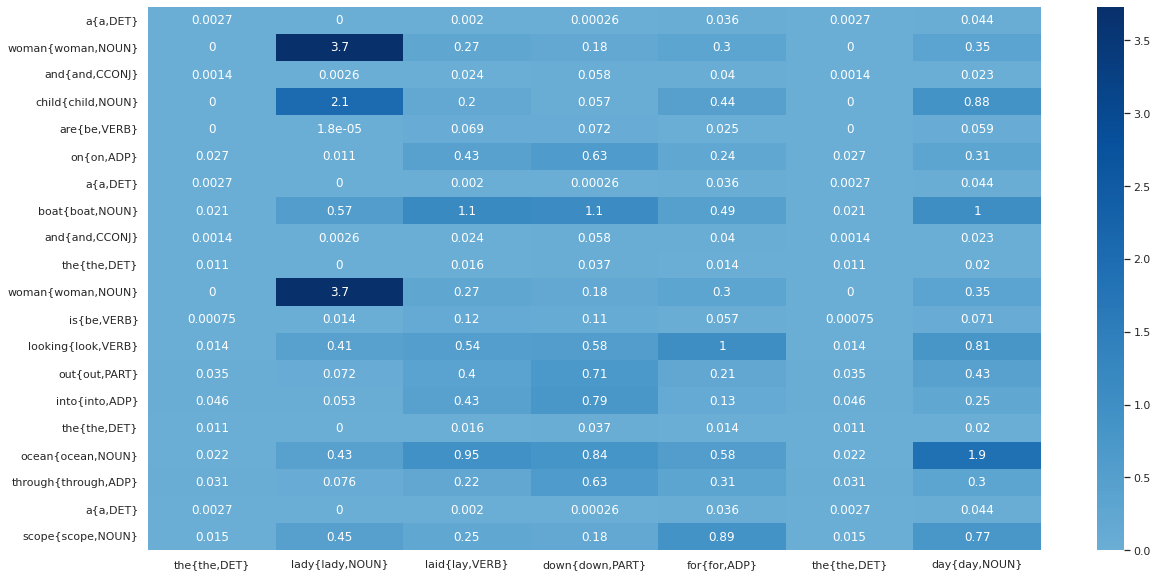

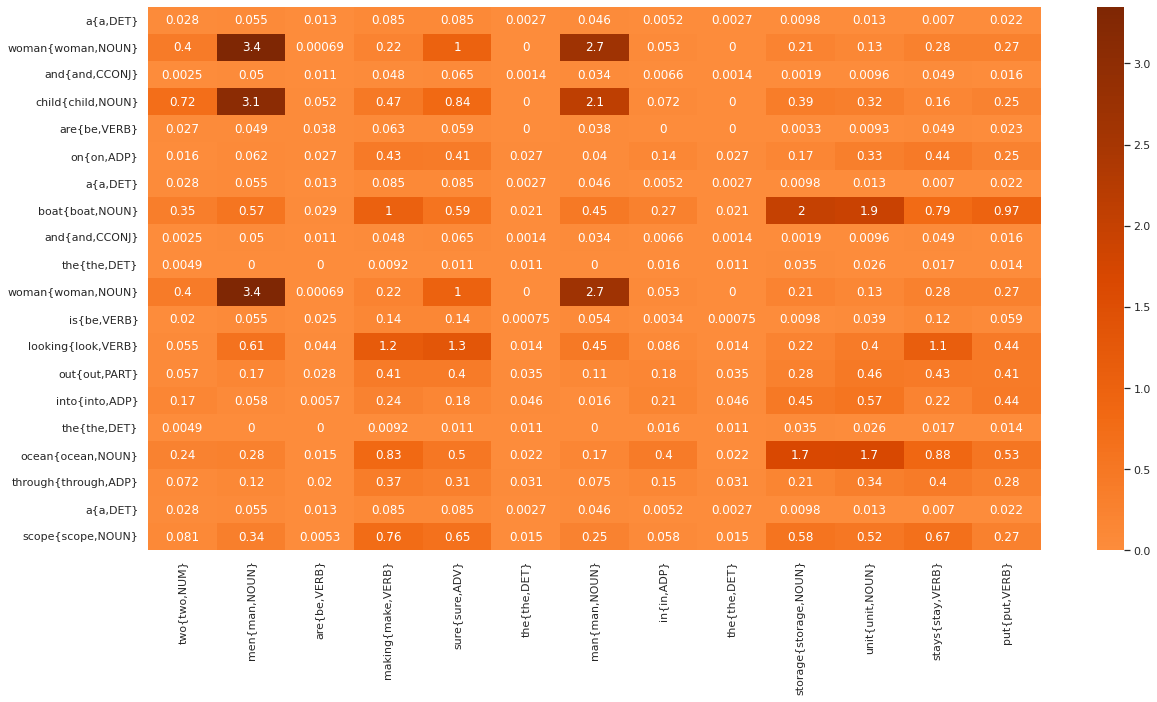

In [87]:
sns.set(rc={'figure.figsize':(20,10)})
#fig,  axes= plt.subplots(2,2)
sns.heatmap(data=dfn.M_Align[0], center=0, cmap='Blues', annot=True)

#axes[0,0].set(title="Parafraseo: "+str(dfn.paraphrase[0]))
plt.show()
sns.heatmap(data=dfn.M_Align[1], center=0, cmap='Oranges', annot=True)
#axes[1,0].set(title="Parafraseo: "+str(dfn.paraphrase[1]))
plt.show()

In [69]:
sns.heatmap(data=pd.DataFrame(dfn.ma_umbral[10]), center=0, cmap='Blues_r', annot=True)

ValueError: could not convert string to float: ',4.792034,1.2544161,4.0742073,1.2544161,5.9056015,1.2759184,3.4269645,2.9598155,4.0742073,1.2759184,3.9917367,3.4269645,3.4911647,2.7808723,2.194706,2.3690941,3.2156246'

In [59]:
dfn

,Idx,Texto,Hipotesis,M_Align,ma_umbral,Paraphrase,predicted_label,gold_label
0,3587,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, lady{lady,NOU...","the{the,DET} lady{lady,...",...,0,entailment,contradiction
1,3587,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","two{two,NUM} men{man,NO...",...,1,contradiction,contradiction
2,3076,"[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","the{the,DET} man{man,NOU...",NOUN VERB ADP ADV ADJ NOUN ...,0,entailment,neutral
3,3076,"[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[NULL{null,PROPN}, someone{someone,NOUN}, in{i...","someone{someone,NOUN} in...",...,1,neutral,neutral
4,8200,"[NULL{null,PROPN}, a{a,DET}, crowd{crowd,NOUN}...","[NULL{null,PROPN}, the{the,DET}, statue{statue...","the{the,DET} statue{sta...",...,0,neutral,contradiction
...,...,...,...,...,...,...,...,...
567,5116,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, ju...","[NULL{null,PROPN}, a{a,DET}, soccer{soccer,NOU...","a{a,DET} soccer{soccer,...",...,1,contradiction,contradiction
568,2045,"[NULL{null,ADJ}, boy{boy,NOUN}, with{with,ADP}...","[NULL{null,PROPN}, the{the,DET}, boy{boy,NOUN}...","the{the,DET} boy{boy,NOUN...",NOUN VERB ADP ...,0,entailment,contradiction
569,2045,"[NULL{null,ADJ}, boy{boy,NOUN}, with{with,ADP}...","[NULL{null,INTJ}, no{no,DET}, one{one,NOUN}, i...","no{no,DET} one{one,NOUN} ...",NOUN VERB ADP ADV ...,1,contradiction,contradiction
570,9215,"[NULL{null,PROPN}, this{this,DET}, man{man,NOU...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","the{the,DET} man{man,NOUN...",NOUN VERB ADP ADV ADJ NOU...,0,neutral,contradiction


In [ ]:
for i in parafraseo_correctos:
    temp = dfn[dfn["Idx"]==i]
    